In [121]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import src.cleaning as cleaning
import src.attacks_profile as attacks_profile
import src.attacks_location_month as attacks_location_month
import src.attacks_surfers_injuries as attacks_surfers_injuries

import warnings
warnings.filterwarnings("ignore")

In [122]:
attacks = pd.read_csv("./data/attacks.csv",  encoding="latin1")

# Exploration

In [123]:
cleaning.exploration(attacks)

(25723, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 34

# Preliminary cleaning

In [124]:
attacks = cleaning.preliminary_cleaning(attacks)
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
df = pd.read_csv("./data/attacks.csv", encoding="latin1")

In [126]:
#INITIAL EXPLORATION OF THE IMPORTED DATAFRAME
df.head()
df.shape #the dataframe has 25723 rows and 24 columns
df.isnull().sum() #There are a lot of missing values, the column that has more data is Case Number with 8702 Non-Null
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [129]:
#Dropping columns not needed for the analysis
columns_to_drop = ['Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23']
attacks = df.drop(columns_to_drop, axis = 1, inplace=True)

In [130]:
#Dropping duplicated rows and rows with many NaN values
attacks = df.drop_duplicates()
attacks = df.dropna(thresh=10)

In [131]:
#Renaming columns so that it is easier to manage them
attacks.rename(columns = {'Sex ':'Sex','Species ':'Species'}, inplace=True)

In [132]:
# QUESTIONS TO ANSWER
    # 1. What profile do sharks find more attractive? (Age and Sex)
            #Is the Age preference the same one for Male and for Female? 
    # 2. Where and when are there more shark attacks? (Country/Area and month)
    # 3. What is the most common injury among surfers attacked by sharks?
    # 4. Are people injured doing the same activites in Florida vs Worldwide?

    #BONUS: What were doing the people that died while provoking shark attacks?

# 1. What profile do sharks find more attractive? (Age and Sex)

In [179]:
attacks_profile = prefered_profile_transformation(attacks)

In [180]:
#Visualization of the data

The group age that receives more attacks is between 10-20 years old followed by the group from 20-30


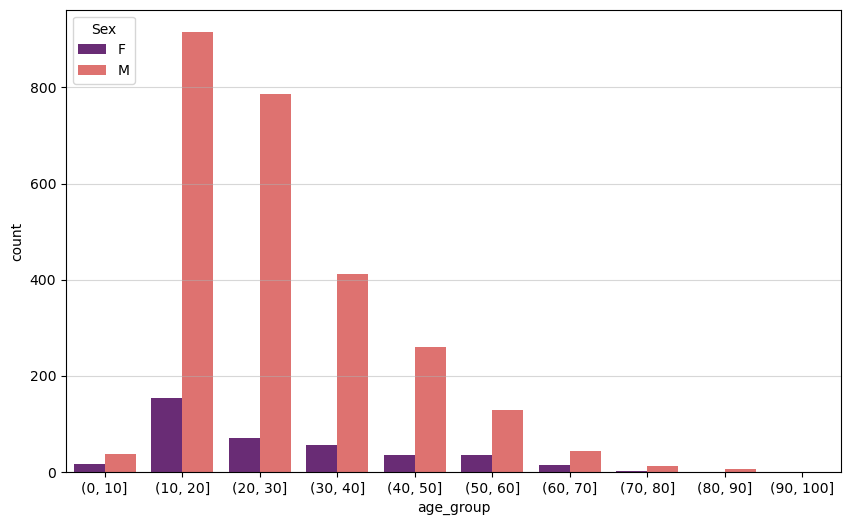

In [181]:
age_graph = prefered_profile_visualization_all(attacks_profile)

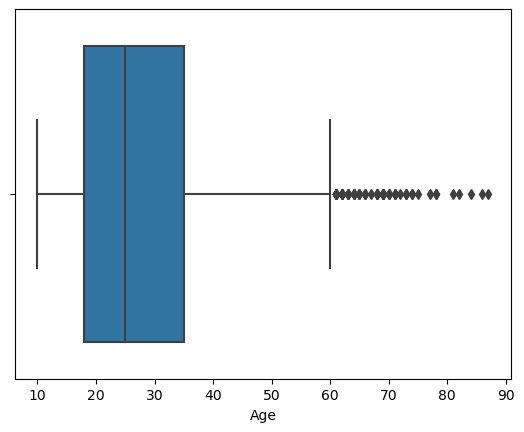

In [136]:
prefered_profile_visualization_male(attacks_profile)

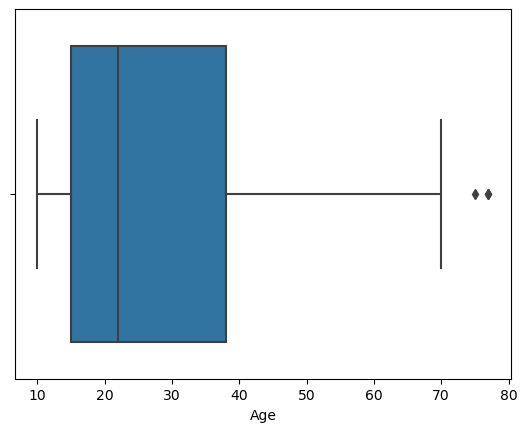

In [137]:
prefered_profile_visualization_female(attacks_profile)

# 2. Where and when are there more shark attacks?
   # Country and Area with more shark attacks

In [139]:
attacks_location = attacks_location_transformation(attacks)

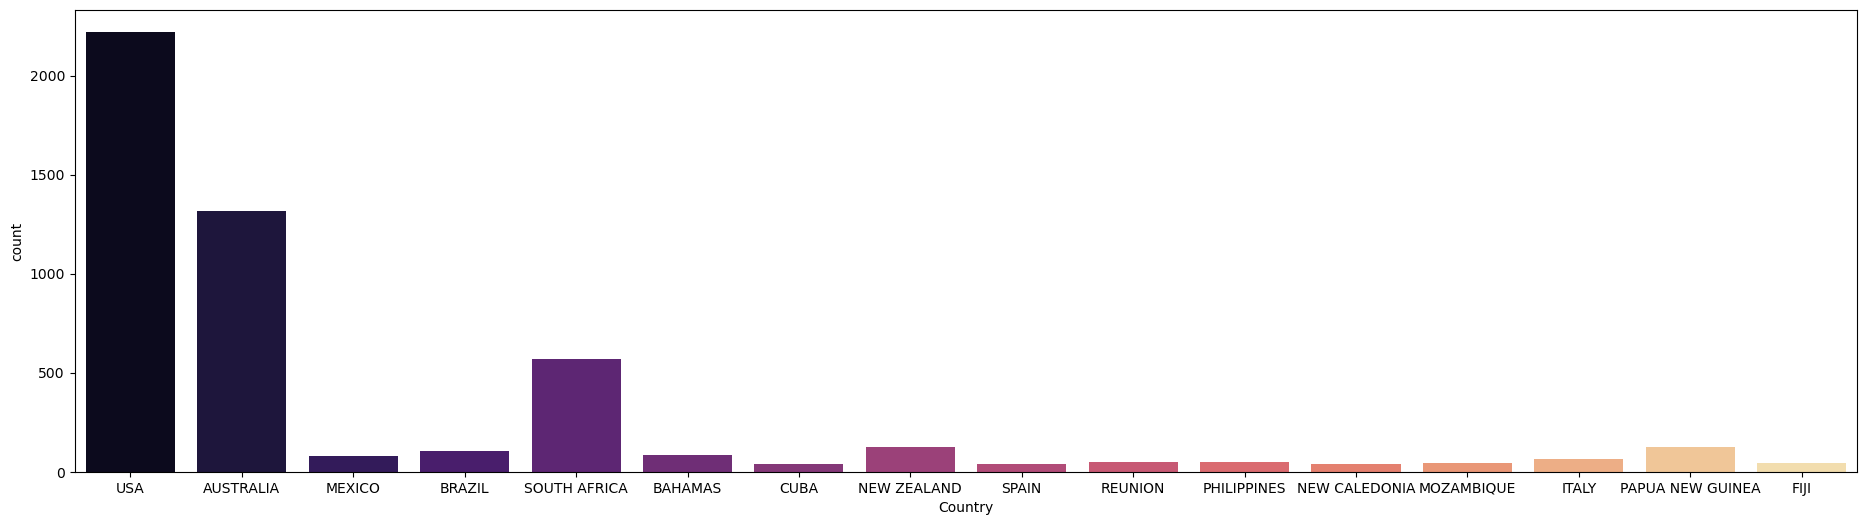

In [140]:
attacks_location_visualization(attacks_location)

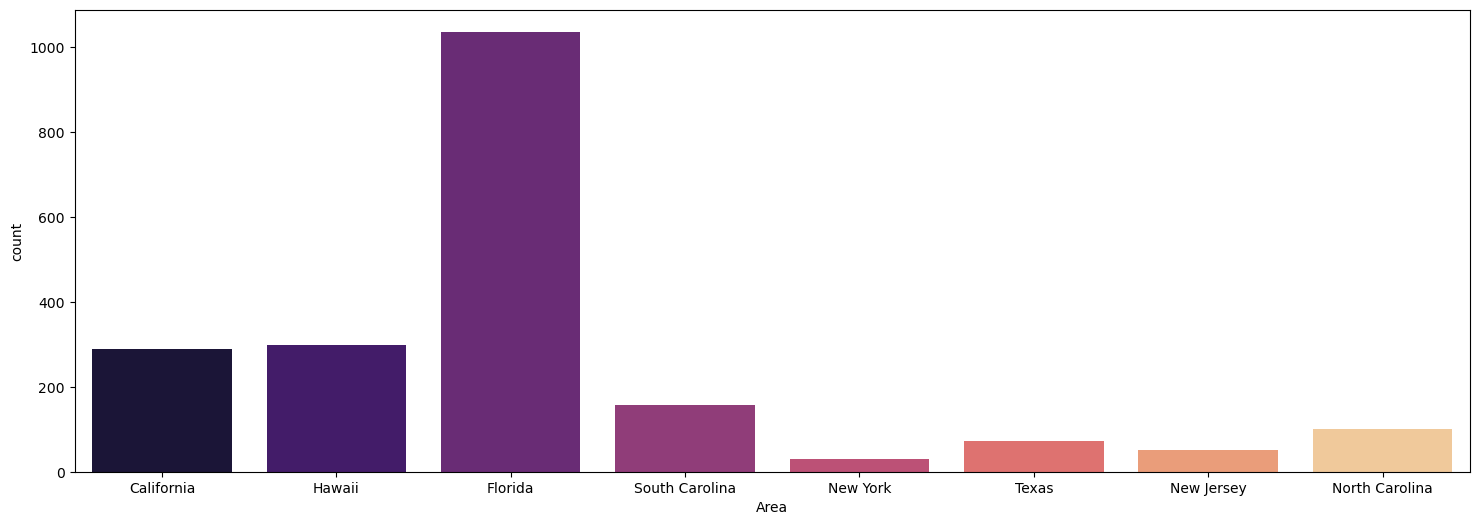

In [172]:
attacks_USA_area_visualization(attacks_location)

# Month and day of the week in this month with more shark attacks


In [142]:
attacks_month = attacks_month_transformation(attacks)

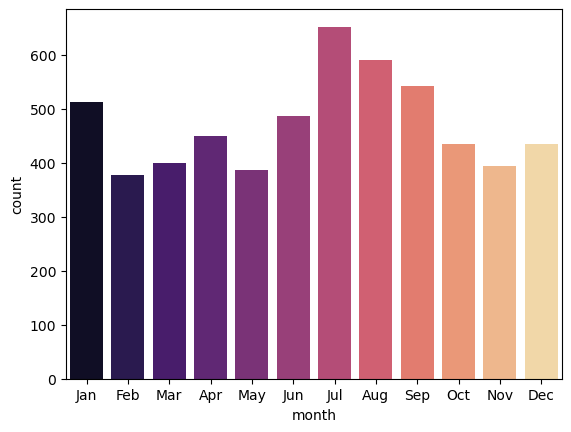

In [143]:
attacks_month_visualization(attacks_month)

# Has it changed over the last 20 years?

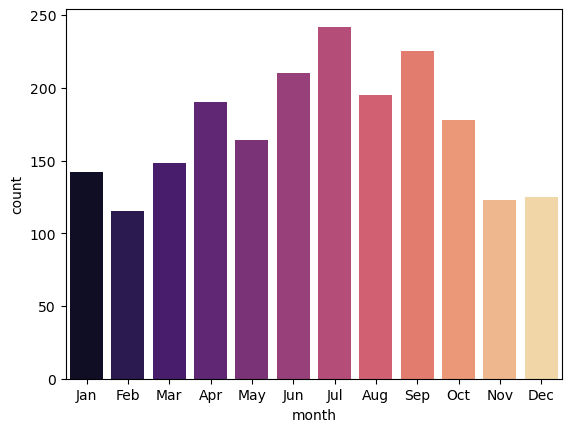

In [144]:
attacks_month_last_20_years_visualization(attacks_month)

# In what day of the week are there more shark attacks?

In [145]:
attacks_month = attacks_day_of_the_week_transformation(attacks_month)

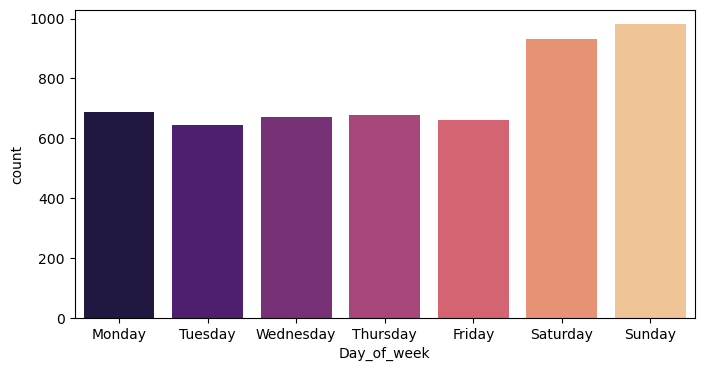

In [146]:
attacks_day_of_the_week_visualization(attacks_month)

# What is the most common injury among surfers attacked by sharks?

In [152]:
attacks_injuries = attacks_injuries_transformation(attacks)

In [153]:
surfing_injuries = attacks_injuries_surfing(attacks_injuries)

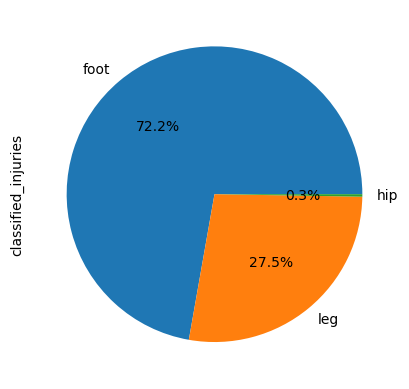

In [154]:
surfing_injuries_visualization(surfing_injuries)

In [155]:
#Are people injured doing the same activites in Florida vs Worldwide?

In [156]:
attacks_in_Florida = attacks_activities_Florida(attacks_injuries)

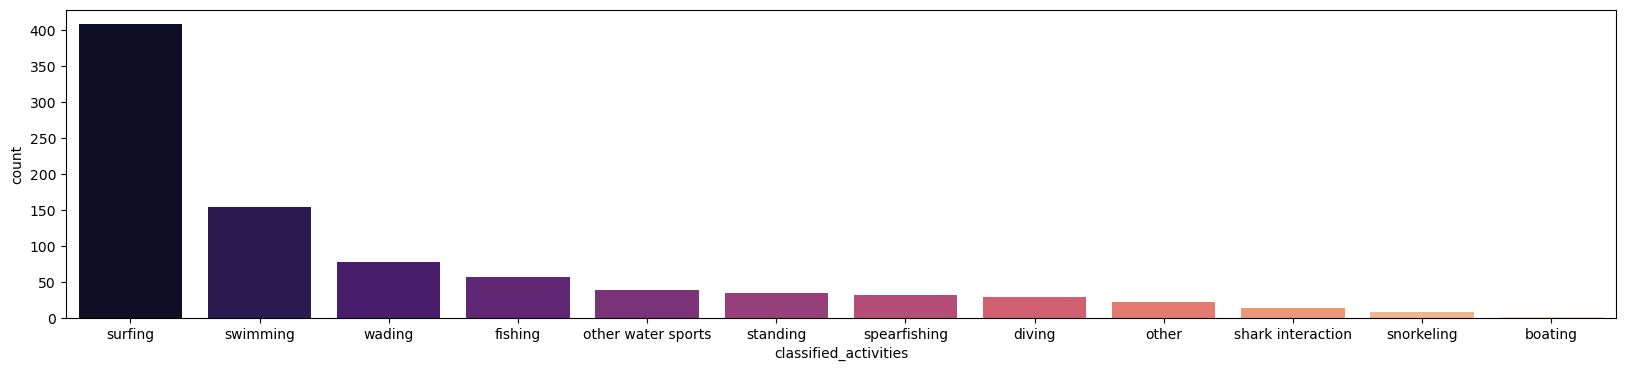

In [157]:
attacks_activities_Florida_visualization(attacks_injuries)

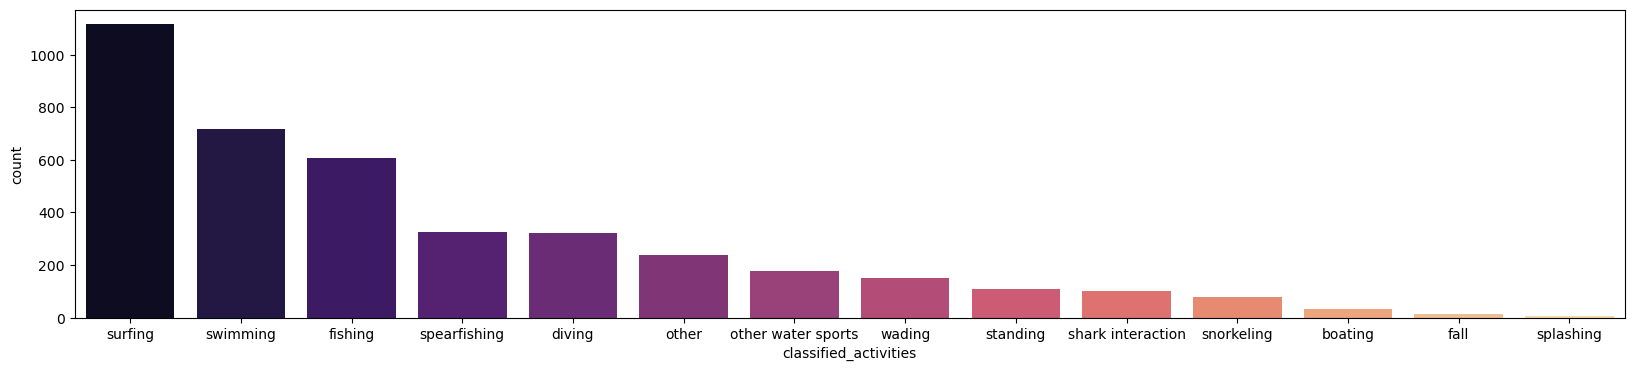

In [158]:
attacks_activities_world_visualization(attacks_injuries)

# BONUS: What were doing the people that died while provoking shark attacks?

In [159]:
attacks['Type'].value_counts()

Unprovoked      4232
Provoked         537
Sea Disaster     208
Boating          177
Boat             113
Invalid           22
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [160]:
subset = attacks[["Type", "Activity", "Injury", 'Fatal (Y/N)']]
condition1 = subset["Type"] == "Provoked"
condition2 = subset["Fatal (Y/N)"] == "Y"
subset[condition1 & condition2]

,Type,Activity,Injury,Fatal (Y/N)
473,Provoked,Fishing,"FATAL, arm bitten by shark hauled on deck ...",Y
1554,Provoked,Removing shark from net,FATAL PROVOKED INCIDENT,Y
1843,Provoked,Shark Fishing,Drowned when caught in line and pulled overboa...,Y
3601,Provoked,Fishing from 34' boat when pulled overboard by...,FATAL PROVOKED INCIDENT,Y
3891,Provoked,Fishing (trolling) from canoe,"FATAL, hooked shark pulled him into the water ...",Y
4005,Provoked,"Fishing, hooked shark towed boat out to sea, s...","FATAL, due to drowning PROVOKED INCIDENT",Y
4240,Provoked,Attempting to kill a shark with explosives,"FATAL, PROVOKED INCIDENT",Y
4241,Provoked,Attempting to kill a shark with explosives,"FATAL, PROVOKED INCIDENT",Y
4245,Provoked,Floating in inner tube,FATAL. His brother speared a shark which then ...,Y
4403,Provoked,Fishing,Multiple injuries PROVOKED INCIDENT,Y


In [161]:
# Conclusion: do not attemp to kill a shark with explosives or you might end up dying. 